In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Content


### Stores
Anonymized information about the 45 stores, indicating the type and size of store

### Features
Contains additional data related to the store, department, and regional activity for the given dates.

* Store - the store number
* Date - the week
* Temperature - average temperature in the region
* Fuel_Price - cost of fuel in the region
* MarkDown1-5 - anonymized data related to promotional markdowns. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA
* CPI - the consumer price index
* Unemployment - the unemployment rate
* IsHoliday - whether the week is a special holiday week

### Sales
Historical sales data, which covers to 2010-02-05 to 2012-11-01. Within this tab you will find the following fields:

* Store - the store number
* Dept - the department number
* Date - the week
* Weekly_Sales -  sales for the given department in the given store
* IsHoliday - whether the week is a special holiday week

In [ ]:
features = pd.read_csv("Features data set.csv")
sales = pd.read_csv("sales data-set.csv")
stores = pd.read_csv("stores data-set.csv")

In [ ]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [ ]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


##  Анализируем данные

Посмотрим на продажи магазинов по типам, для этого сначала надо добавить поле Type в таблицу продажи

In [ ]:
sales = sales.merge(stores, on=["Store"])

In [ ]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,05/02/2010,24924.50,False,A,151315
1,1,1,12/02/2010,46039.49,True,A,151315
2,1,1,19/02/2010,41595.55,False,A,151315
3,1,1,26/02/2010,19403.54,False,A,151315
4,1,1,05/03/2010,21827.90,False,A,151315


Посчитаем средние статистики по продажам по неделям без выходных и с выходными за 2011 год

In [ ]:
sales.groupby("Type").agg({"Weekly_Sales" : "mean", "Size": "mean"})

,Weekly_Sales,Size
Type,,
A,20099.568043,182231.285486
B,12237.075977,101818.735827
C,9519.532538,40535.725286


Можем увидеть, что магазины по типам отличаются как по средней недельной выручке так и по своему размеру

In [ ]:
sales.groupby("Type").agg({"Weekly_Sales" : "max", "Size": "max"})

,Weekly_Sales,Size
Type,,
A,474330.10,219622
B,693099.36,140167
C,112152.35,42988


In [ ]:
sales.groupby("Type").agg({"Weekly_Sales" : "min", "Size": "min"})

,Weekly_Sales,Size
Type,,
A,-4988.94,39690
B,-3924.00,34875
C,-379.00,39690


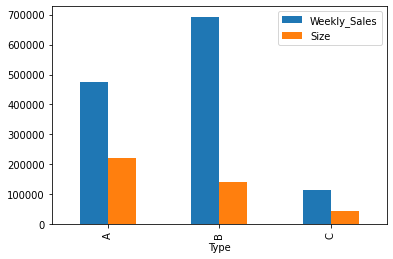

In [ ]:
sales.groupby("Type").agg({"Weekly_Sales" : "max", "Size": "max"}).plot(kind="bar")

In [ ]:
not_holiday_mean

,Weekly_Sales
Date,
01/04/2011,43458991.19
01/06/2012,48281649.72
01/07/2011,47578519.50
01/10/2010,42239875.87
02/03/2012,46861034.97
...,...
30/03/2012,45272862.02
30/04/2010,43705126.71
30/07/2010,44630363.42
